In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import testZ, proportions, testZ_cum
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign1_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [3]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


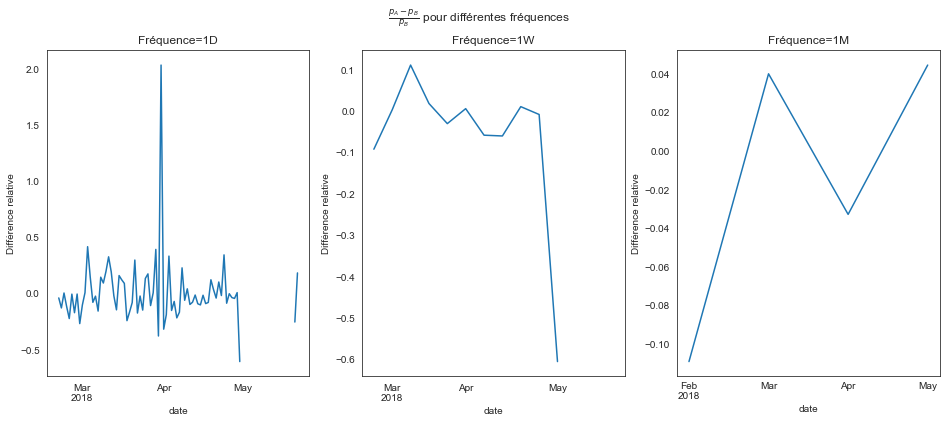

In [4]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Commentaires: comportement périodique pour la fréquence 1D, RAS pour les autres

#### b. Pattern journalier, hebdomadaire, mensuel?

In [3]:
dataA, dataB = preparer(data)

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


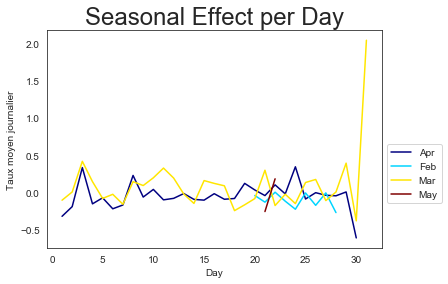

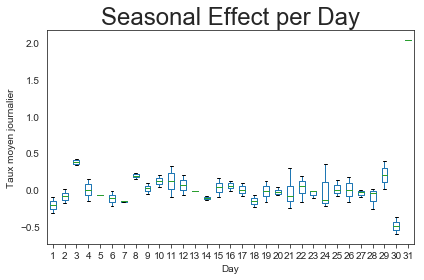

In [4]:
diff = (dataA['is_conv'] - dataB['is_conv']) /dataB['is_conv']
diff.index = pd.to_datetime(diff.index)
diff = pd.Series.to_frame(diff)
effet_journalier(diff)

Pattern en début de mois et fin de mois? lègère augmentation, il faudrait plus de données pour confirmer

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [5]:
Z_cum, P_rej, p_cum = testZ_cum(data)

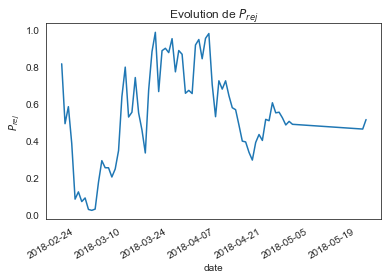

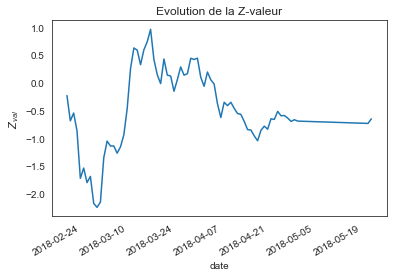

In [6]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

Pas de stabilisation observée (la ligne droite correspond à l'abscence de point).

### 3. Évolution de la significativité du test

#### a. Significativité à 90%

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :
8.3


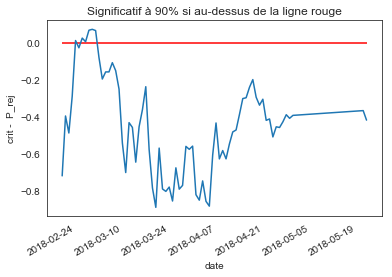

In [54]:
crit = 0.1 #90%

s =  - (P_rej - crit)  # il faut P_rej < crit, soit s > 0
   
s.plot(title="Significatif à 90% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :")
print(round(sum((P_rej - crit < 0))/len(P_rej)*100,1))


##### Par semaine

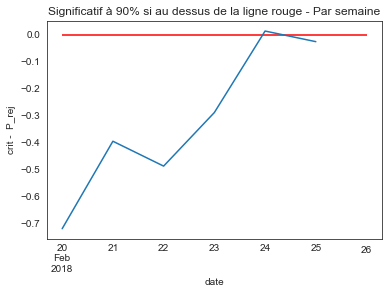

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
16.7


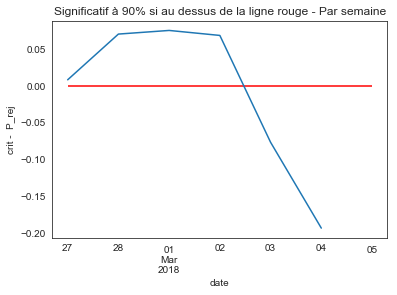

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
66.7


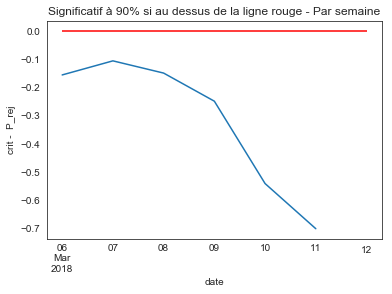

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


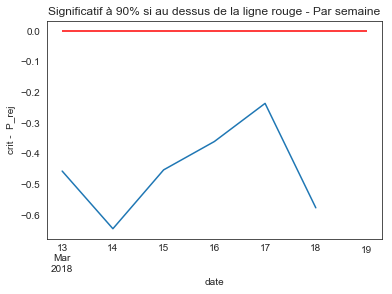

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


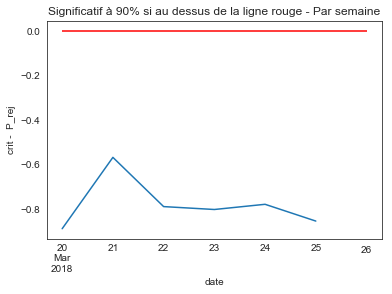

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


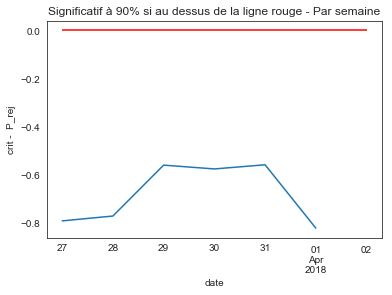

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


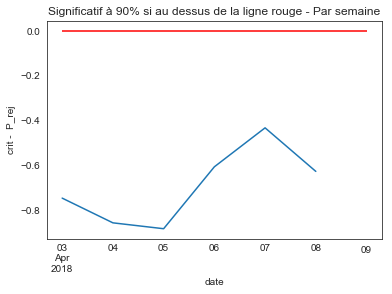

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


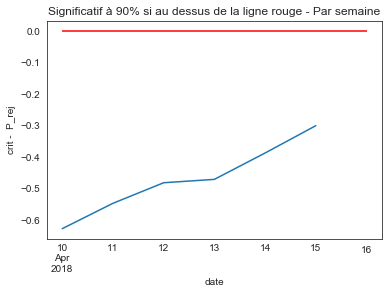

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


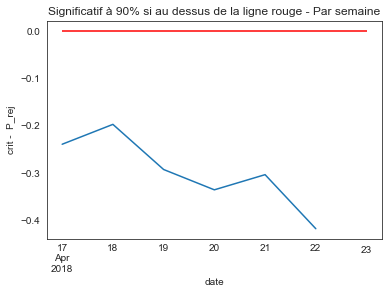

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


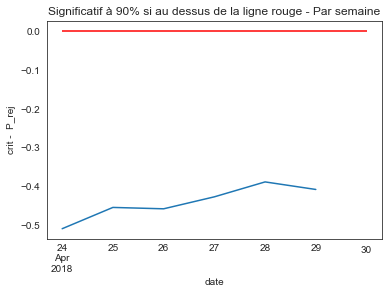

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


In [55]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    # pourcentage de p_val significative ie < crit
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))
    


##### Par mois

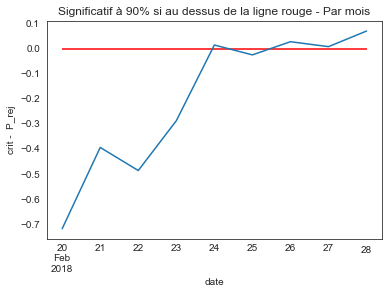

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
44.4


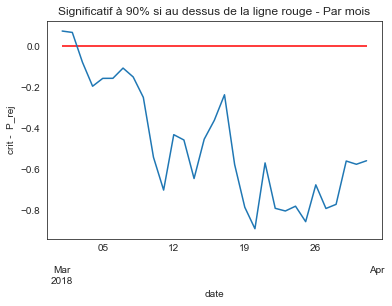

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
6.5


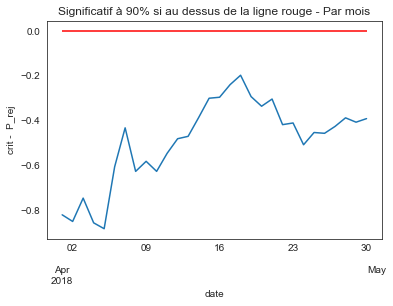

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
0.0


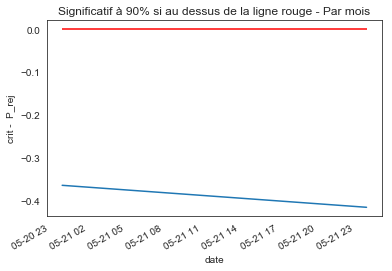

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
0.0


In [56]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

#### b. Significativité à 80%

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :
11.1


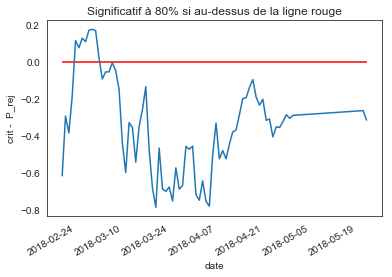

In [57]:
crit = 0.2 #80%

s = - (P_rej - crit)

s.plot(title="Significatif à 80% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :")
print(round(sum((P_rej - crit <= 0))/len(P_rej)*100,1))

##### Par semaine

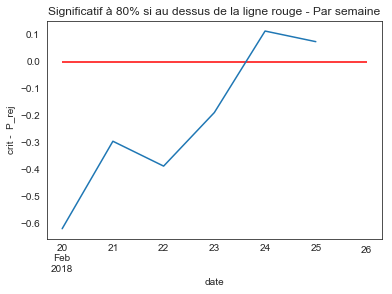

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
33.3


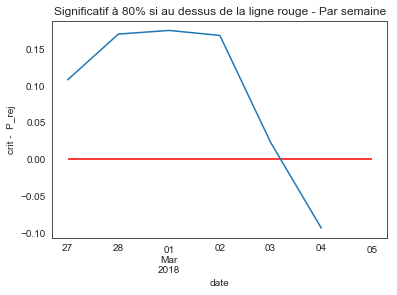

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
83.3


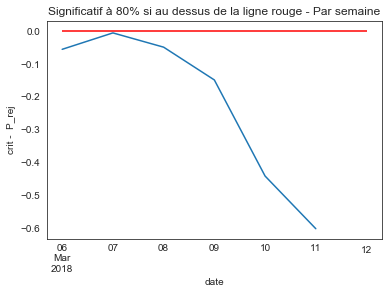

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


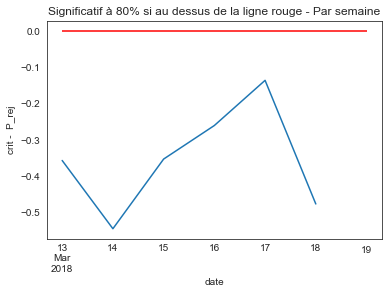

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


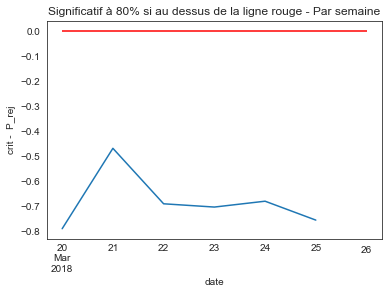

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


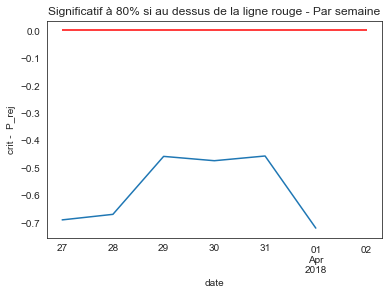

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


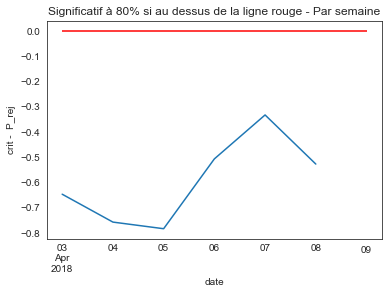

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


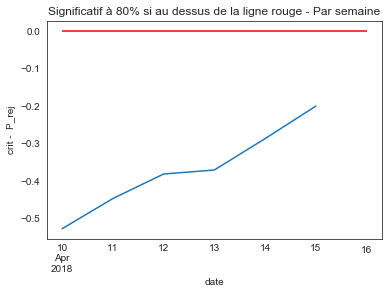

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


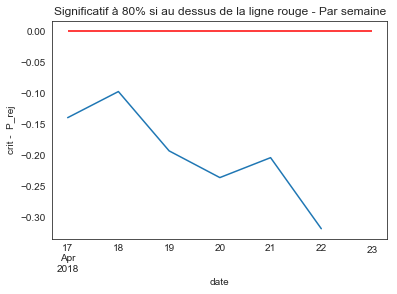

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


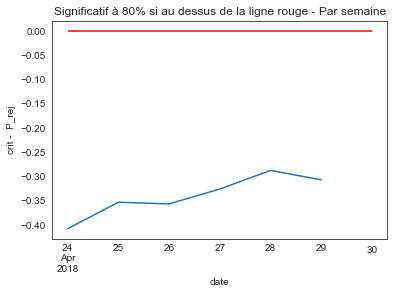

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


In [58]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))

##### Par mois


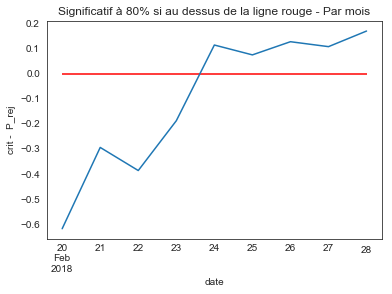

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
55.6


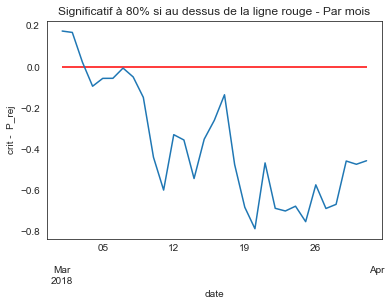

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
9.7


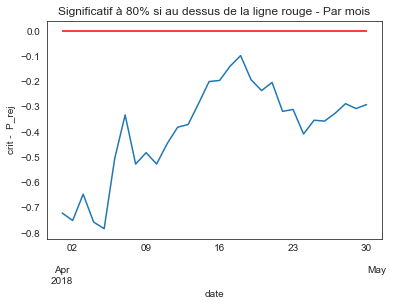

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
0.0


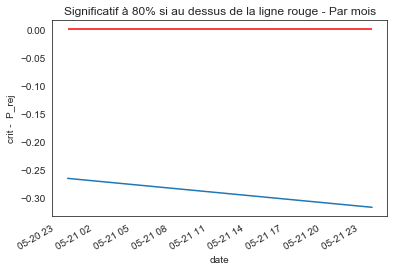

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
0.0


In [49]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

En moyenne il y a de 0 à 1 variation de la significativité dans un mois ou une semaine pour les deux niveaux de confiance.

### 4. Stationnarité de la série de la différence relative des taux de conversion journaliers

In [14]:
adf_test(diff['is_conv'])
        

,Results of Augmented Dickey-Fuller test:
test statistic,-1.019875e+01
p-value,6.048428e-18
# of lags,0.000000e+00
# of observations,7.100000e+01
Critical Value (1%),-3.526005e+00
Critical Value (5%),-2.903200e+00
Critical Value (10%),-2.588995e+00


La stationnarité  de  la  série  est  évaluée  grâce  au  test  de  Dickey-Fuller,  ce  qui
engendrera ou non des transformations diférentielle ou logarithmique sur la série. L’intérêt de cette
étude est de déterminer si la série est stationnaire et la tranformer si ce n’est pas le cas. En effet,
la moyenne d’une série stationnaire ne dépend pas du temps, ni même sa fonction de convariance, il est donc plus aisé de manipuler des séries stationnaires.

Ici, la statistique de test est supérieur à la valeur critique à 1%, la série n'est pas stationnaire. Elle l'est après différenciation au 1er ordre:

In [15]:
adf_test(np.diff(diff['is_conv']))

,Results of Augmented Dickey-Fuller test:
test statistic,-7.406942e+00
p-value,7.302738e-11
# of lags,3.000000e+00
# of observations,6.700000e+01
Critical Value (1%),-3.531955e+00
Critical Value (5%),-2.905755e+00
Critical Value (10%),-2.590357e+00
